In [1]:
%matplotlib inline
from pathlib import Path
from dataclasses import dataclass
import uproot
import hist
import mplhep as hep
import numpy as np
hep.style.use(hep.styles.CMS)

In [2]:
data_dir = Path('/store/user/seyang/tmp/dqm')
path = next(data_dir.glob('**/*.root'))

In [3]:
root_file = uproot.open(path)

In [4]:
run = int(path.stem.split('_')[2][1:])
print(f'{run=:d}')

run=357900


In [5]:
eff_dir = root_file[f'DQMData/Run {run}/GEM/Run summary/Efficiency/muonSTA']

In [6]:
region = 1
station = 1
layer = 1

region_char = 'P' if region > 0 else 'M'
gem_label = f'GE{station}1-{region_char}-L{layer}'

In [7]:
denom = eff_dir[f'chamber_ieta_{gem_label}'].values().sum(axis=1)
num = eff_dir[f'chamber_ieta_match_{gem_label}'].values().sum(axis=1)
eff = eff_dir[f'eff_chamber_{gem_label}'].values()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7820aa3f40>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7818a1f0d0>, text=[])

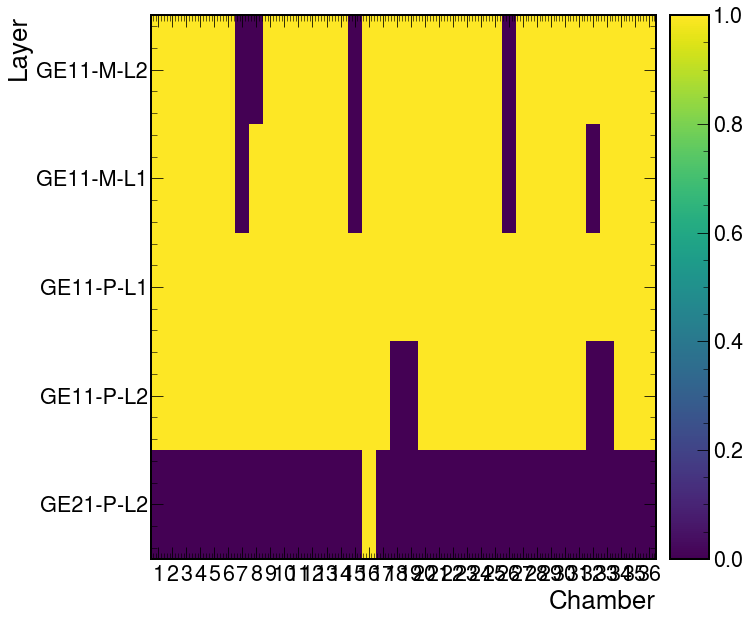

In [8]:
report_summary_map = root_file[f'DQMData/Run {run}/GEM/Run summary/EventInfo/reportSummaryMap'].to_hist()
report_summary_map.plot()

In [9]:
status = report_summary_map.values()[:, 3]

In [10]:
@dataclass
class DQMInfo:
    region: int
    station: int
    layer: int
    run: int
    eff: np.ndarray
    num: np.ndarray
    denom: np.ndarray
    status: np.ndarray

In [11]:
dqm_info = DQMInfo(region, station, layer, run, eff, num, denom, status)